<a href="https://colab.research.google.com/github/data-to-insights/COLLECTIVE2_TRADING/blob/master/Project2_Pani_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PORTFOLIO OPTIMIZATION

In [ ]:
!pip install simfin

In [ ]:
! pip install pandas_datareader

In [3]:
# General Imports
import pandas as pd
import numpy as np
import os
import datetime as dt
import random
import time
import pandas_datareader.data as web

# Import the main functionality from the SimFin Python API.
import simfin as sf
from simfin.names import *

# Import Path
from pathlib import Path

# Imports for matplot Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pylab

# Imports for plotly visualizations
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Imports for google colab visualizations
from google.colab import widgets
from google.colab import output
from matplotlib import pylab
from six.moves import zip
from __future__ import print_function


/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [4]:
%load_ext google.colab.data_table

In [5]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [6]:
csvpath2 = Path("My Drive/Colab Notebooks/PROJECT 2/Data Sets/snp500-historical.csv")

In [7]:
df_snp500 = pd.read_csv(csvpath2, index_col = 'Date', parse_dates = True, infer_datetime_format = True)

In [8]:
df_snp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03 16:00:00,1418.03,1429.42,1407.86,1416.63,0
2007-01-04 16:00:00,1416.60,1421.84,1408.22,1418.34,0
2007-01-05 16:00:00,1418.34,1418.34,1405.75,1409.71,0
2007-01-08 16:00:00,1409.26,1414.98,1403.97,1412.84,0
2007-01-09 16:00:00,1412.84,1415.61,1405.42,1412.11,0


In [9]:
# this is SNP500 Index
df_snp500.head()

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03 16:00:00,1418.03,1429.42,1407.86,1416.63,0
2007-01-04 16:00:00,1416.60,1421.84,1408.22,1418.34,0
2007-01-05 16:00:00,1418.34,1418.34,1405.75,1409.71,0
2007-01-08 16:00:00,1409.26,1414.98,1403.97,1412.84,0
2007-01-09 16:00:00,1412.84,1415.61,1405.42,1412.11,0


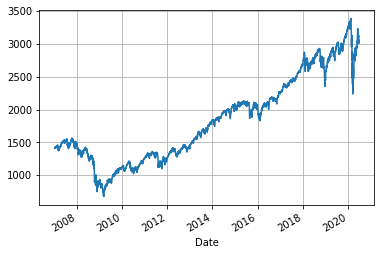

In [10]:
# Plot the closing prices for `snp500 index`
df_snp500['Close'].plot(grid=True)

# Show the plot
plt.show()

In [11]:
# Plotly graphs
px.line(
    df_snp500['Close'], x=df_snp500.index, y=df_snp500['Close'], title="LONG TERM RETURNS"
)

In [12]:
print("I am the first print statement of the cell")

# Now we can create a grid, optional header_row and header_column
# control whether we want header elements in the grid
grid = widgets.Grid(2, 2, header_row=True, header_column=True)
with grid.output_to(1, 1):
  print("Bye grid")

# Note we can output to arbitrary cell, not necessarily in order
with grid.output_to(0, 0):
  print("Hello grid")

print("Now we are outside")

with grid.output_to(1, 0):
  print("Back inside!")

# Any output can be printed to individual cells, not just print statements.

I am the first print statement of the cell


,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Bye grid


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Hello grid


<IPython.core.display.Javascript object>

Now we are outside


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Back inside!


<IPython.core.display.Javascript object>

,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

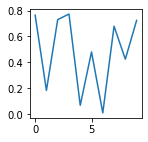

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

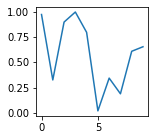

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

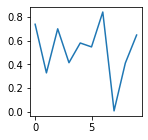

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

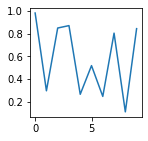

<IPython.core.display.Javascript object>

In [13]:
grid = widgets.Grid(2, 2)
for i in range(20):
  with grid.output_to(random.randint(0, 1), random.randint(0, 1)):
    grid.clear_cell()
    pylab.figure(figsize=(2, 2))
    pylab.plot(np.random.random((10, 1)))
  time.sleep(0.5)

Different orientations for tabs


,,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---- start ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

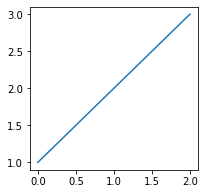

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

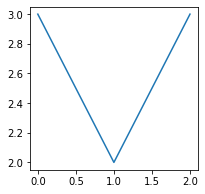

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---- bottom ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

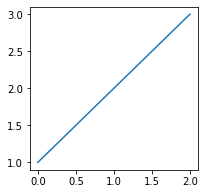

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

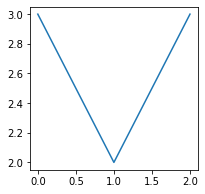

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---- end ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

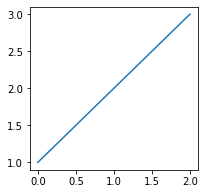

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

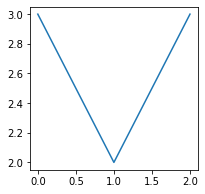

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---- top ---


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

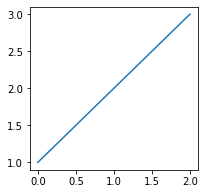

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

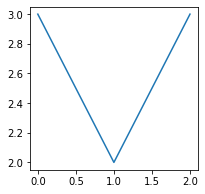

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
def create_tab(location):
  tb = widgets.TabBar(['a', 'b'], location=location)
  with tb.output_to('a'):
    pylab.figure(figsize=(3, 3))
    pylab.plot([1, 2, 3])
  # Note you can access tab by its name (if they are unique), or
  # by its index.
  with tb.output_to(1):
    pylab.figure(figsize=(3, 3))
    pylab.plot([3, 2, 3])
    pylab.show()


print('Different orientations for tabs')

positions = ['start', 'bottom', 'end', 'top']

for p, _ in zip(positions, widgets.Grid(1, 4)):
  print('---- %s ---' % p)
  create_tab(p)